In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import seaborn as sns

In [30]:
#!python -m pip install scipy==1.2 --upgrade


In [31]:
#!pip install statsmodels --upgrade

In [138]:
delivery=pd.read_csv("D:\dinesh document\EXCELR\Data Science\Assingment\Simple linear Regression\delivery_time.csv")

## EDA

In [139]:
delivery.head(2)

,Delivery_Time,Sorting_Time
0,21.0,10
1,13.5,4


In [140]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [141]:
delivery.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [144]:
delivery.isna().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

## Visualization

In [145]:
X,Y=delivery[['Sorting_Time']],delivery['Delivery_Time']

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

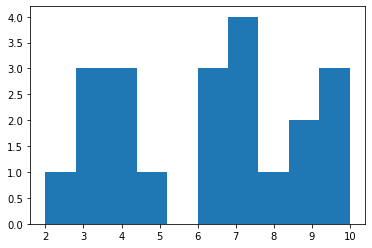

In [146]:
plt.hist(X)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

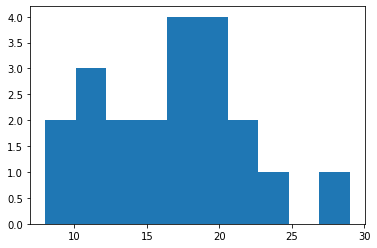

In [147]:
plt.hist(Y)

In [148]:
delivery.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:>

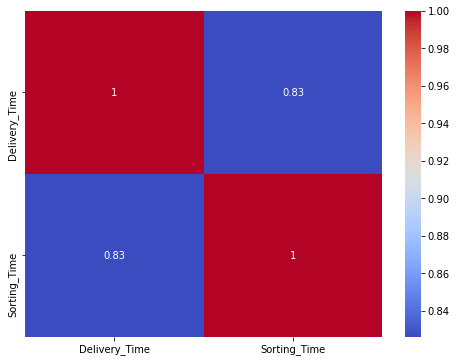

In [149]:
plt.figure(figsize=(8,6))
sns.heatmap(delivery.corr(),cmap='coolwarm',annot=True)

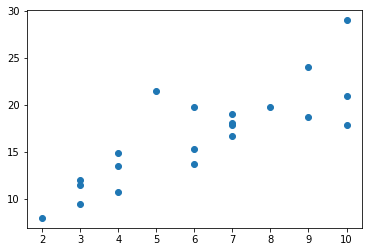

In [150]:
plt.scatter(X,Y)

In [151]:
X,Y=delivery[['Sorting_Time']],delivery['Delivery_Time']

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

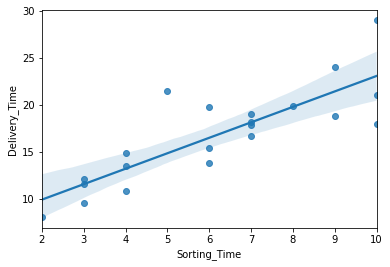

In [152]:
sns.regplot(y='Delivery_Time',x='Sorting_Time',data=delivery)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

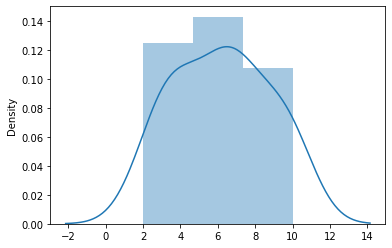

In [89]:
sns.distplot(X)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

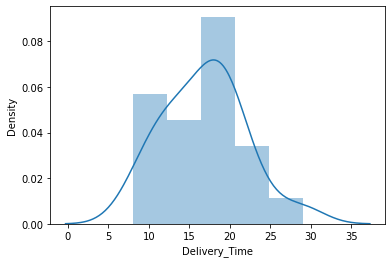

In [90]:
sns.distplot(Y)

In [91]:
delivery.columns

Index(['Delivery_Time', 'Sorting_Time'], dtype='object')

In [92]:
delivery.iloc[:,[0,1]]


,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#### Model Training

In [93]:
model=ols('Delivery_Time~Sorting_Time',data=delivery).fit()

In [94]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        12:34:24   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
# prediction 1

pred1=model.predict(X)
print(pred1)
print(Y)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64
0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery_Time, dtype: float64


In [96]:
pred1.corr(delivery.Delivery_Time)

0.8259972607955325

Text(0.5, 1.0, 'residual Plot')

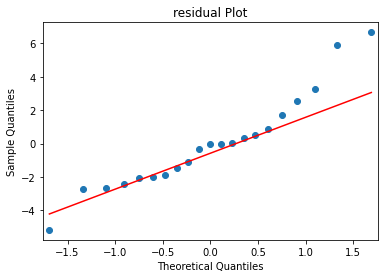

In [97]:
# QQplot
sm.qqplot(model.resid,line='q')
plt.title("residual Plot")

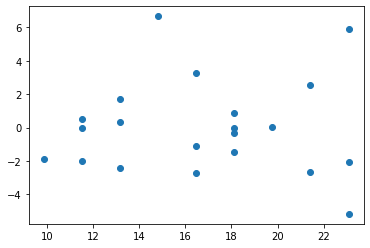

In [98]:
# Residual plot for homodscedasticity
plt.scatter(model.fittedvalues,model.resid)
plt.show()

In [159]:
# Cook distance
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model3.get_influence()
(c, _) = model_influence.cooks_distance

In [160]:
c.argmax()

8

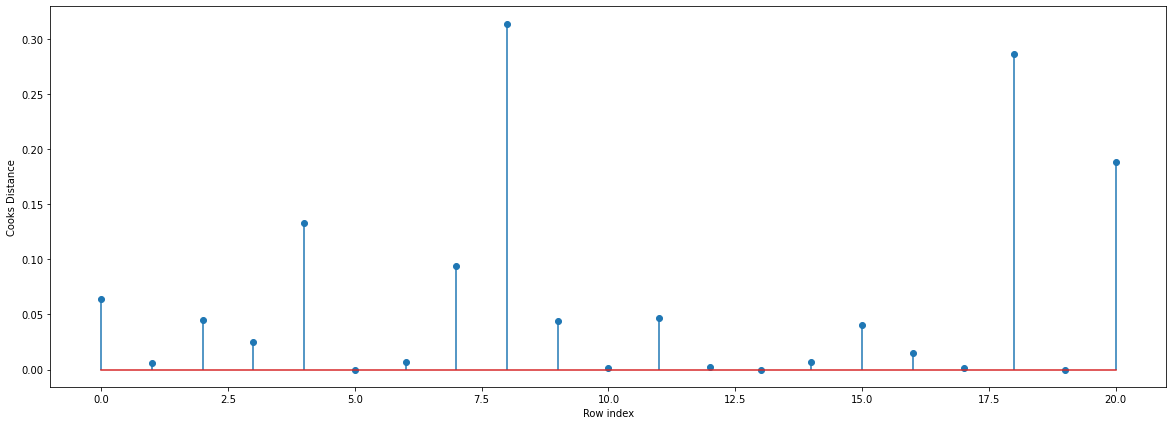

In [161]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(delivery)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [163]:
# High influence points
k = delivery.shape[1]
n = delivery.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.42857142857142855

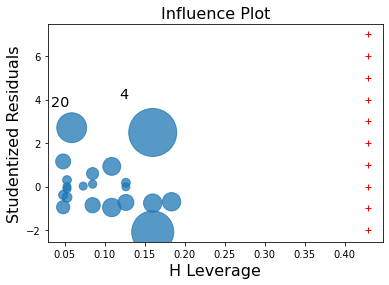

In [164]:
influence_plot(model,alhpa=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [165]:
delivery.drop([8,18],inplace=True)

In [166]:
new_model=ols('Delivery_Time~Sorting_Time',data=delivery).fit()
new_model.summary()

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     39.97
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           7.65e-06
Time:                        13:53:36   Log-Likelihood:                -45.181
No. Observations:                  19   AIC:                             94.36
Df Residuals:                      17   BIC:                             96.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.2071      1.850      3.356      0.004       2.305      10.109
Sorting_Time     1.7693      0.280      6.323      0.000       1.179       2.360
==============================================================================
Omnibus:                        4.363   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                2.706
Skew:                           0.916   Prob(JB):                        0.258
Kurtosis:                       3.251   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log Transformation

In [99]:
model2 = ols('Delivery_Time~np.log(Sorting_Time)',data=delivery).fit()

In [100]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           2.64e-06
Time:                        12:35:25   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
model2.params

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [102]:
model2.conf_int(0.01)

,0,1
Intercept,-5.862666,8.182033
np.log(Sorting_Time),5.115458,12.971369


In [103]:
pred2=model2.predict(X)
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [104]:
pred2.corr(delivery.Delivery_Time)

0.8339325279256242

Text(0.5, 1.0, 'residual Plot')

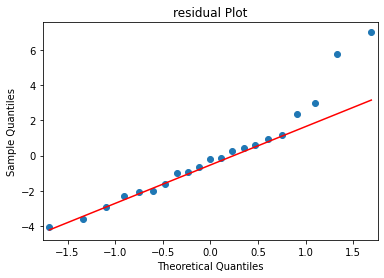

In [105]:
# QQplot
sm.qqplot(model2.resid,line='q')
plt.title("residual Plot")

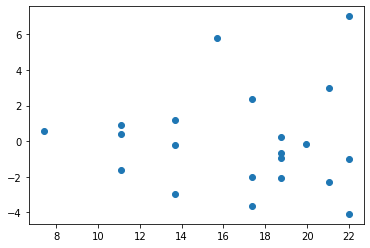

In [106]:
# Residual plot for homodscedasticity
plt.scatter(model2.fittedvalues,model2.resid)
plt.show()

## Exponential transformation on y

In [108]:
model3 = ols('np.log(Delivery_Time)~Sorting_Time',data=delivery).fit()

In [109]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Wed, 14 Dec 2022   Prob (F-statistic):           1.59e-06
Time:                           12:36:06   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
pred3_log = model3.predict(pd.DataFrame(delivery['Sorting_Time']))

In [111]:
pred3 = np.exp(pred3_log)
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [112]:
pred3.corr(delivery.Delivery_Time)

0.8085780108289259

Text(0.5, 1.0, 'residual Plot')

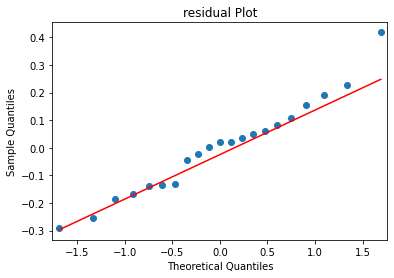

In [113]:
# QQplot
sm.qqplot(model3.resid,line='q')
plt.title("residual Plot")

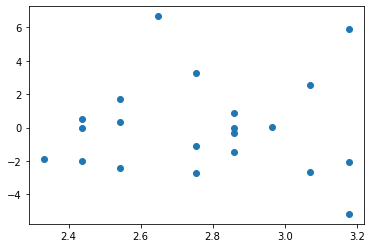

In [114]:
# Residual plot for homodscedasticity
plt.scatter(model3.fittedvalues,model.resid)
plt.show()

### SQRT transformation

In [120]:
delivery["DeliveryTime_sqrt"] = np.sqrt(delivery.Delivery_Time)

In [121]:
delivery

,Delivery_Time,Sorting_Time,DeliveryTime_sqrt
0,21.00,10,4.582576
1,13.50,4,3.674235
2,19.75,6,4.444097
3,24.00,9,4.898979
4,29.00,10,5.385165
5,15.35,6,3.917908
6,19.00,7,4.358899
7,9.50,3,3.082207
8,17.90,10,4.230839
9,18.75,9,4.330127


In [122]:
model4 = ols('DeliveryTime_sqrt~Sorting_Time',data=delivery).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      DeliveryTime_sqrt   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           2.00e-06
Time:                        12:39:45   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
Sorting_Time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
delivery.iloc[:,[0,2]]

,Delivery_Time,DeliveryTime_sqrt
0,21.00,4.582576
1,13.50,3.674235
2,19.75,4.444097
3,24.00,4.898979
4,29.00,5.385165
5,15.35,3.917908
6,19.00,4.358899
7,9.50,3.082207
8,17.90,4.230839
9,18.75,4.330127


In [124]:
pred4=model4.predict(X)
print(pred4)
print(Y)

0     4.839049
1     3.599258
2     4.012522
3     4.632417
4     4.839049
5     4.012522
6     4.219154
7     3.392626
8     4.839049
9     4.632417
10    4.425786
11    3.599258
12    4.219154
13    3.392626
14    3.392626
15    3.599258
16    4.012522
17    4.219154
18    3.185995
19    4.219154
20    3.805890
dtype: float64
0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery_Time, dtype: float64


In [125]:
pred4.corr(delivery.Delivery_Time)

0.8259972607955327

Text(0.5, 1.0, 'residual Plot')

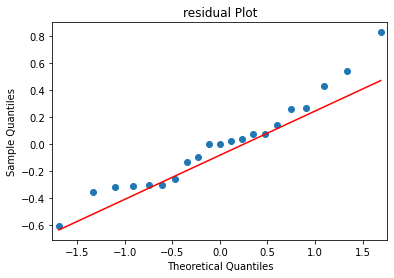

In [126]:
# QQplot
sm.qqplot(model4.resid,line='q')
plt.title("residual Plot")

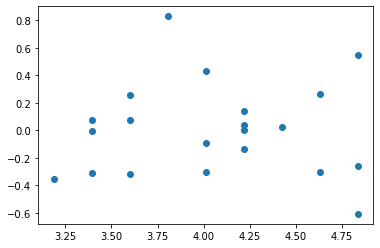

In [168]:
# Residual plot for homodscedasticity
plt.scatter(model4.fittedvalues,model4.resid)
plt.show()

## SQ transformation

In [130]:
delivery["DeliveryTime_sqrd"] = delivery.Delivery_Time*delivery.Delivery_Time

In [131]:
delivery["DeliveryTime_sqrd"]

0     441.0000
1     182.2500
2     390.0625
3     576.0000
4     841.0000
5     235.6225
6     361.0000
7      90.2500
8     320.4100
9     351.5625
10    393.2289
11    115.5625
12    278.2224
13    132.2500
14    144.7209
15    221.4144
16    189.0625
17    327.9721
18     64.0000
19    317.9089
20    462.2500
Name: DeliveryTime_sqrd, dtype: float64

In [133]:
model5=ols('DeliveryTime_sqrd~Sorting_Time',data=delivery).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      DeliveryTime_sqrd   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     28.82
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           3.52e-05
Time:                        12:47:42   Log-Likelihood:                -128.87
No. Observations:                  21   AIC:                             261.7
Df Residuals:                      19   BIC:                             263.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -37.4401     69.013     -0.543      0.594    -181.887     107.007
Sorting_Time    55.5538     10.348      5.368      0.000      33.894      77.213
==============================================================================
Omnibus:                        9.930   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                7.498
Skew:                           1.194   Prob(JB):                       0.0235
Kurtosis:                       4.694   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
pred5=model5.predict(X)
print(pred5)
print(Y)

0     518.097748
1     184.775053
2     295.882618
3     462.543965
4     518.097748
5     295.882618
6     351.436400
7     129.221270
8     518.097748
9     462.543965
10    406.990183
11    184.775053
12    351.436400
13    129.221270
14    129.221270
15    184.775053
16    295.882618
17    351.436400
18     73.667487
19    351.436400
20    240.328835
dtype: float64
0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery_Time, dtype: float64


In [135]:
pred5.corr(delivery.Delivery_Time)

0.8259972607955324

Text(0.5, 1.0, 'residual Plot')

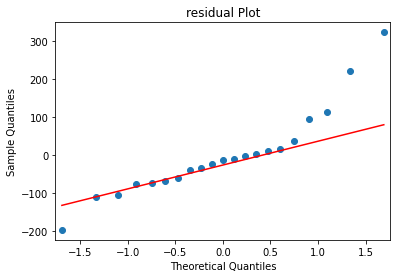

In [136]:
# QQplot
sm.qqplot(model5.resid,line='q')
plt.title("residual Plot")

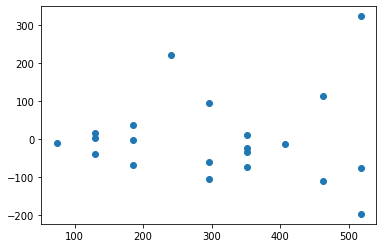

In [167]:
# Residual plot for homodscedasticity
plt.scatter(model5.fittedvalues,model5.resid)
plt.show()

#### Model with Log transformation givinig highest R-squared. Hence we can use model with log transformation for prediction.